## **Import packages**

In [2]:
import pickle

# For data manipulation
import numpy as np
import pandas as pd


# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For modelling
pd.set_option('display.max_columns', None)

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, recall_score, precision_score, f1_score, accuracy_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier

### **Load dataset**

In [3]:
# Load dataset into a dataframe
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
df0.head(5)


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## **Data Exploration (Initial EDA and data cleaning)**

- Understand your variables
- Clean your dataset (missing data, redundant/duplicate data, outliers)



### Gather basic information about the data

In [4]:
# Gather basic information about the data
df0.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### **Descriptive Statistics**

In [5]:
# Gather descriptive statistics about the data
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Columns Renaming

In [6]:
df0.columns


Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [7]:
# Rename columns as needed
df0 = df0.rename(columns={'average_montly_hours': 'average_monthly_hours',
                          'time_spend_company': 'tenure',
                          'Work_accident': 'work_accident',
                          'Department': 'department'})


df0.columns


Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Missing values checking

In [8]:
# Check for missing values
df0.isna().sum()


satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

There is no missing value in the data

### Duplicates Checking

In [9]:
# Check for duplicates
df0.duplicated().sum()


3008

~20% of the data is duplicate

In [10]:
# Inspect some rows containing duplicates as needed
df0[df0.duplicated()].head()


,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low


In [11]:
# Drop duplicates
df1 = df0.drop_duplicates()


df1.head()


,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Checking outliers

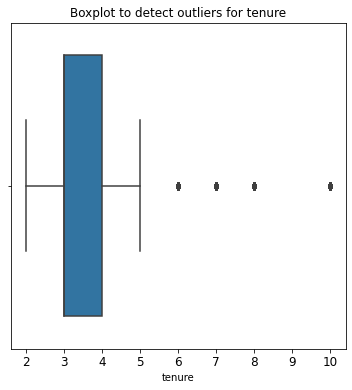

In [12]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
plt.figure(figsize=(6,6))
plt.title('Boxplot to detect outliers for tenure', fontsize = 12)
plt.xticks(fontsize=12)
sns.boxplot(x = df1['tenure'])
plt.show()

In [13]:
# Determine the number of rows where `tenure` is outlier

percentile_25 = df1['tenure'].quantile(0.25)
percentile_75 = df1['tenure'].quantile(0.75)

iqr = percentile_75 - percentile_25

tenure_upper_limit = percentile_75 + 1.5*iqr
tenure_lower_limit = percentile_25 - 1.5*iqr

outliers_tenure = (df1.tenure < tenure_lower_limit) | (df1.tenure > tenure_upper_limit)

print("Number of outliers in tenure are: ", outliers_tenure.sum())

Number of outliers in tenure are:  824


In [14]:
# Determine the number of rows where `number_project` is outlier

percentile_25 = df1['number_project'].quantile(0.25)
percentile_75 = df1['number_project'].quantile(0.75)

iqr = percentile_75 - percentile_25

number_project_upper_limit = percentile_75 + 1.5*iqr
number_project_lower_limit = percentile_25 - 1.5*iqr

outliers_number_project = (df1.number_project < number_project_lower_limit) | (df1.number_project > number_project_upper_limit)

print("Number of outliers in number_project are: ", outliers_number_project.sum())

Number of outliers in number_project are:  0


In [15]:
# Determine the number of rows where `average_monthly_hours` is outlier

percentile_25 = df1['average_monthly_hours'].quantile(0.25)
percentile_75 = df1['average_monthly_hours'].quantile(0.75)

iqr = percentile_75 - percentile_25

average_monthly_hours_upper_limit = percentile_75 + 1.5*iqr
average_monthly_hours_lower_limit = percentile_25 - 1.5*iqr

outliers_average_monthly_hours = (df1.average_monthly_hours < average_monthly_hours_lower_limit) | (df1.average_monthly_hours > average_monthly_hours_upper_limit)

print("Number of outliers in average_monthly_hours are: ", outliers_average_monthly_hours.sum())

Number of outliers in average_monthly_hours are:  0


## **Data Exploration**

In [16]:
# Get numbers of people who left vs. stayed
print(df1.left.value_counts())
print()
# Get percentages of people who left vs. stayed
print(df1.left.value_counts(normalize=True))

0    10000
1     1991
Name: left, dtype: int64

0    0.833959
1    0.166041
Name: left, dtype: float64


16.5% of the people left the company

### Data visualizations

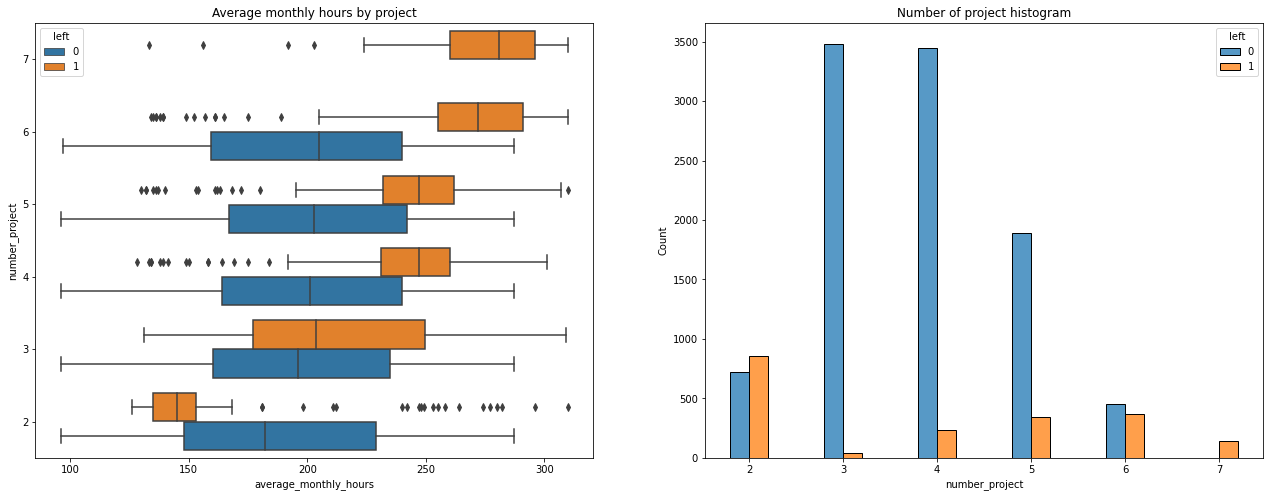

In [18]:
# Relationship between `number_project`, `average_monthly_hours` and `left` i.e. target variables.

fig, ax = plt.subplots(1,2, figsize = (22,8))
sns.boxplot(df1, x = 'average_monthly_hours', y = 'number_project', hue = 'left', ax = ax[0], orient='h')
ax[0].invert_yaxis()
ax[0].set_title('Average monthly hours by project')


sns.histplot(df1, x = 'number_project', hue = 'left', ax = ax[1], multiple='dodge', discrete=1, shrink=0.4)
ax[1].set_title('Number of project histogram')
plt.show()

* Employees involve in multiple project(>3) are overworked and are more likely to left the company may be because of not managing their work-life balance.
* Employees which have very low working hours are also more likely to left the company may be because of not finding interest in what they are doing or might be they get fired because of not producing any impact.

In [19]:
df1[df1.number_project == 7].left.value_counts()

1    145
Name: left, dtype: int64

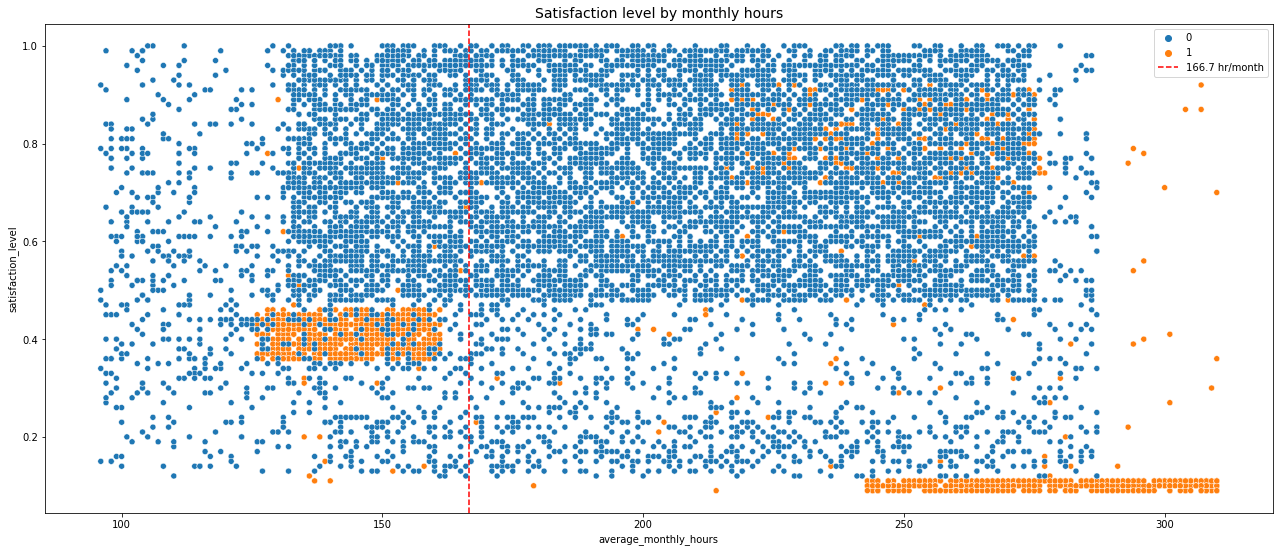

In [20]:
# Relationship between `statisfaction_level`, `average_monthly_hours` and `left` i.e. target variables.

plt.figure(figsize=(22,9))
sns.scatterplot(df1, x = 'average_monthly_hours', y = 'satisfaction_level', hue = 'left')
plt.axvline(x = 166.7, color = 'red', label = '166.7 hr/month', ls = '--')
plt.legend()
plt.title('Satisfaction level by monthly hours', fontsize='14')
plt.show()

* Most of the employees are overworked, but there is a set of employees who are overworked and very low satisfication level possible due to work/unfit-in-culture, who lefts the company.
* There is a cluster of employees who works less than average monthly hours and having low satisfaction level, who lefts the company.
* There are also employees who have more working hours than average and good satisfaction level but they left may be because of some better deal else where.

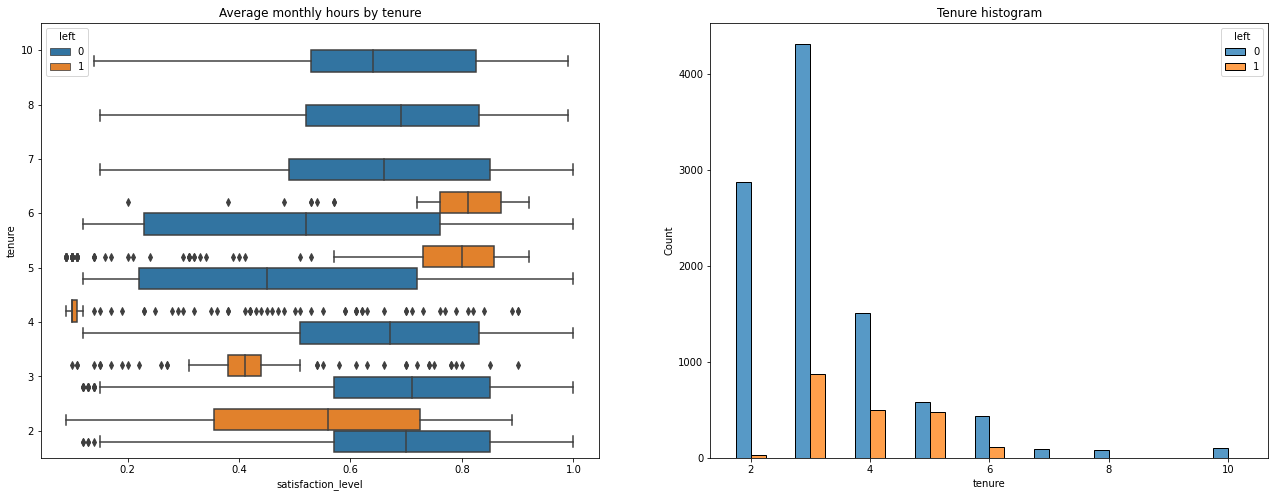

In [21]:
# Relationship between `tenure`, `statisfaction_level`, and `left` i.e. target variables.

fig, ax = plt.subplots(1, 2, figsize = (22,8))

sns.boxplot(df1, x = 'satisfaction_level', y = 'tenure', hue = 'left', orient='h', ax = ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Average monthly hours by tenure')

sns.histplot(df1, x = 'tenure', hue = 'left', ax = ax[1], discrete=1, multiple='dodge', shrink=.5)
ax[1].set_title('Tenure histogram')
plt.show()

* Most of the employee leave between 2 to 5 years of service.
* Satisfaction level of the employees served 4 years is significantly low, may be due to some company policy or some other hidden factor. 

In [22]:
df1.groupby(['left'])['satisfaction_level'].agg([np.mean, np.median])

,mean,median
left,,
0,0.667365,0.69
1,0.440271,0.41


* Overall left employees has low satisfaction score.

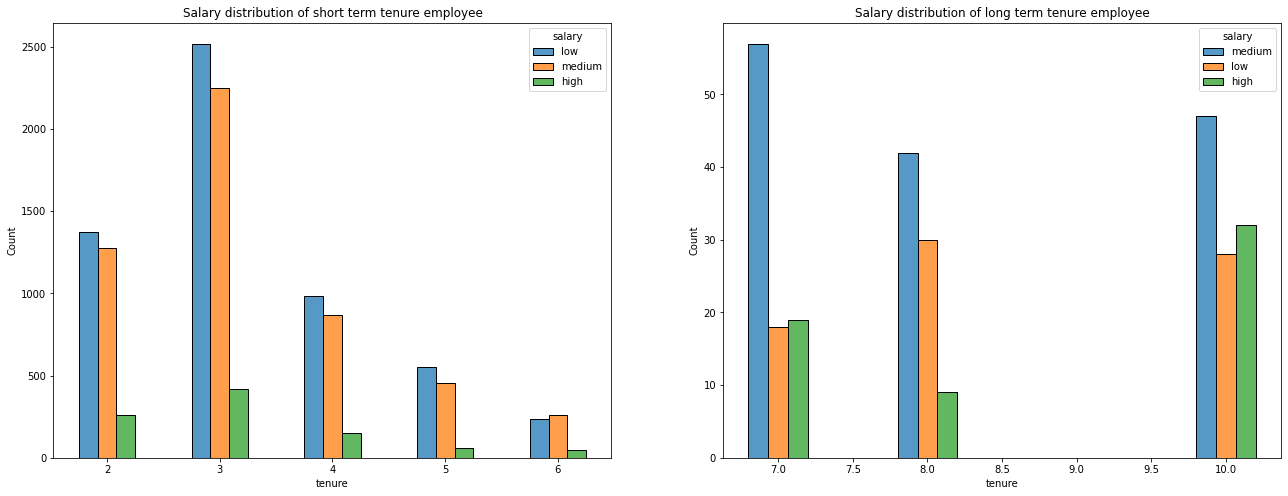

In [23]:
# Relationship between employees `tenure` and `salary`

fig, ax = plt.subplots(1, 2, figsize = (22,8))

short_tenure = df1[df1.tenure < 7]
long_tenure = df1[df1.tenure > 6]

sns.histplot(short_tenure, x = 'tenure', hue = 'salary', shrink=.5, discrete=1, ax = ax[0], multiple='dodge')
ax[0].set_title('Salary distribution of short term tenure employee')


sns.histplot(long_tenure, x = 'tenure', hue = 'salary', shrink=.4, discrete=1, ax = ax[1], multiple='dodge')
ax[1].set_title('Salary distribution of long term tenure employee')
plt.show()

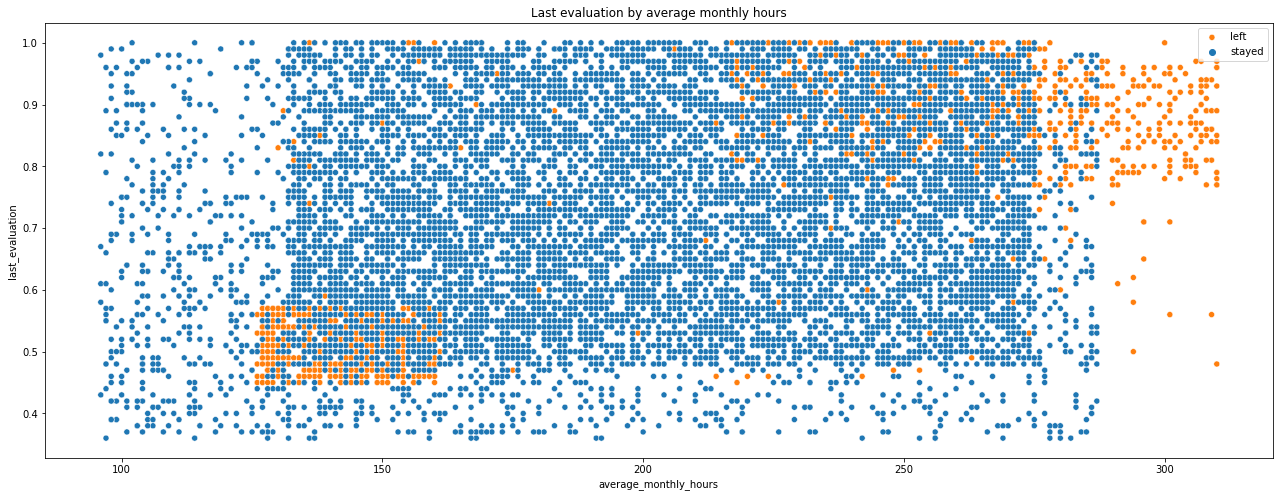

In [24]:
# Relationship between `last_evaluation` score and `average_monthly_hours` with the `left` i.e. target variables.

plt.figure(figsize=(22,8))
sns.scatterplot(df1, x = 'average_monthly_hours', y = 'last_evaluation', hue = 'left')
plt.legend(labels= ['left', 'stayed'])
plt.title('Last evaluation by average monthly hours')
plt.show()

* Large proportions of employees left comes from those who are the most overworked and have good evaluation score or those who work less than average hours and have low evaluation score.

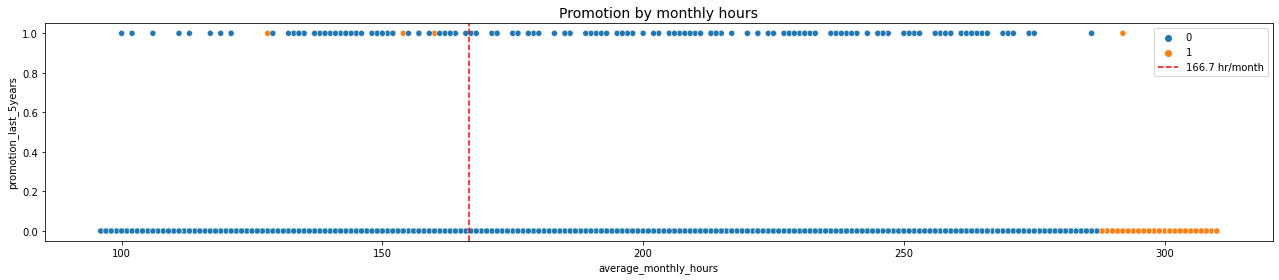

In [25]:
# Relationship between `promotion` with `average_monthly_hours` and `left` i.e. target variables.

plt.figure(figsize=(22,4))
sns.scatterplot(df1, x = 'average_monthly_hours', y = 'promotion_last_5years', hue = 'left')
plt.axvline(x = 166.7, color = 'red', label = '166.7 hr/month', ls = '--')
plt.legend()
plt.title('Promotion by monthly hours', fontsize='14')
plt.show()

* Most of the left employees are overworked and not promoted in the last 5 years.

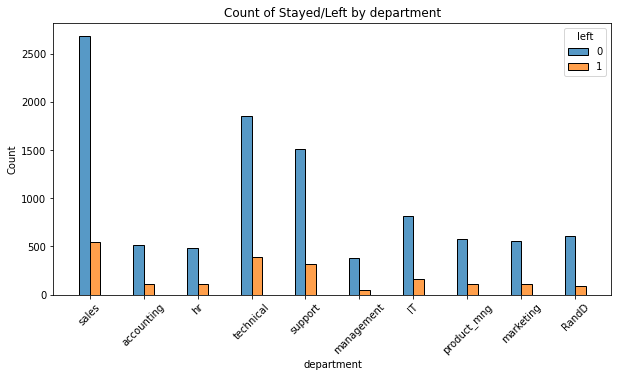

In [26]:
# Visualize the number of employees across departments, and compare left/stayed numbers

plt.figure(figsize=(10,5))
sns.histplot(df1, x = 'department', hue = 'left', discrete=1, shrink=0.4, multiple='dodge')
plt.xticks(rotation='45')
plt.title('Count of Stayed/Left by department')
plt.show()

* Most of the lefties are coming from Sales department and Mangement has least.

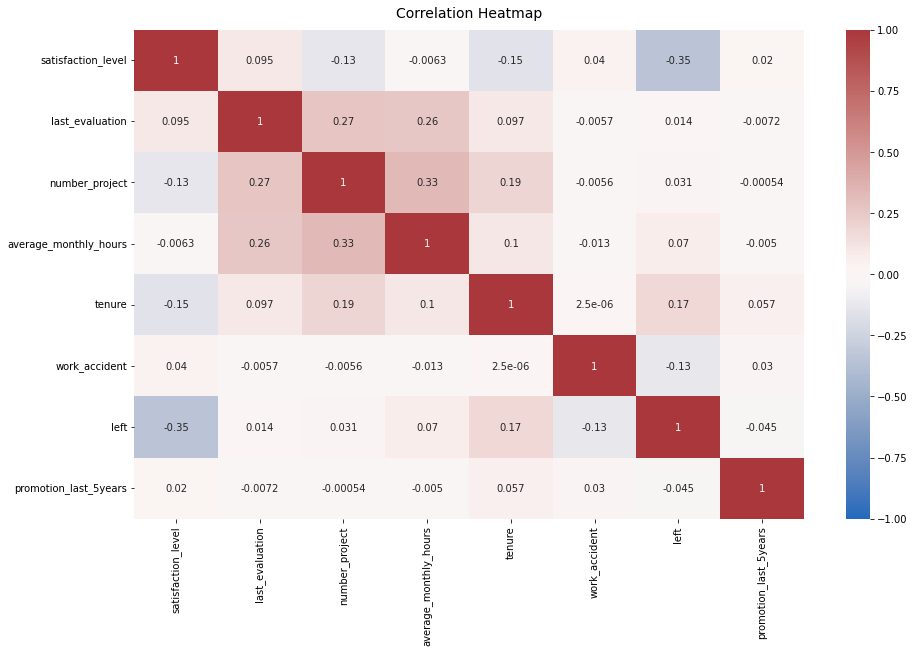

In [27]:
# Check and plot the correlation map of the variables

plt.figure(figsize=(15,9))
heatmap = sns.heatmap(df1.corr(), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette('vlag', as_cmap=True))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);

* `last_evaluation`, `number_project`, and `average_monthly_hours` has good correlation with each other.
* `satisfaction_level` is correlated with `left`, `tenure` and `number_project`.

## **Model Building, Results, and Evaluation**

### **Utils**

In [ ]:
def make_results(model_name, model_object, metric):

    metric_dict = {
        'auc': 'mean_test_roc_auc',
        'precision': 'mean_test_precision',
        'recall': 'mean_test_recall',
        'f1': 'mean_test_f1',
        'accuracy': 'mean_test_accuracy'
      }

    cv_results = pd.DataFrame(model_object.cv_results_)

    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    auc = best_estimator_results.mean_test_roc_auc
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
  
    table = pd.DataFrame()
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy],
                          'auc': [auc]
                        })
  
    return table

In [28]:
def write_pickle(model_object, save_as):
    with open(save_as + '.pickle', 'wb') as to_write:
        pickle.dump(model_object, to_write)

In [29]:
def read_pickle(saved_model_name):
    with open(saved_model_name + '.pickle', 'rb') as to_read:
        model = pickle.load(to_read)

    return model

In [30]:
def get_scores(model_name, model, X_test_data, y_test_data):

    preds = model.best_estimator_.predict(X_test_data)

    auc = roc_auc_score(y_test_data, preds)
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision], 
                          'recall': [recall],
                          'f1': [f1],
                          'accuracy': [accuracy],
                          'AUC': [auc]
                         })
  
    return table

In [31]:
def get_model(model_name):
    model = None
    scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}
    if model_name == 'LR':
        model = LogisticRegression(random_state=42, max_iter=500)
    elif model_name == 'SVC':
        svc = SVC(random_state=0)

        svc_params = {
            'C': [1, 1e-1, 1e-2],
            'kernel': ['linear', 'poly', 'rbf'],
            'gamma': ['scale', 'auto']
        }
        model = GridSearchCV(svc, svc_params, scoring=scoring, cv = 4, refit='roc_auc')
    elif model_name == 'KNN':
        knn = KNeighborsClassifier()

        knn_params = {
            'n_neighbors': [5, 10, 20],
            'weights': ['uniform', 'distance'],
            'algorithm': ['auto', 'ball_tree', 'kd_tree']
        }

        model = GridSearchCV(knn, knn_params, scoring=scoring, cv = 4, refit='roc_auc')
    elif model_name == 'NB':
        model = GaussianNB()
    elif model_name == 'GBC':
        gbc = GradientBoostingClassifier(random_state=0)

        gbc_params = {
            'loss': ['log_loss', 'exponential'],
            'learning_rate': [0.1, 0.01],
            'n_estimators': [100, 300],
            'min_samples_split': [2, 4, 6],
            'max_depth': [3, 5, 7],
            'max_features': ['sqrt', 'log2']
        }
        model = GridSearchCV(gbc, gbc_params, scoring=scoring, cv = 4, refit='roc_auc')
    elif model_name == 'QDA':
        model = QuadraticDiscriminantAnalysis()
    elif model_name == 'XGB':
        xgb = XGBClassifier(random_state=0)
        xgb_params = {
            'objective': ['binary:logistic'],
            'learning_rate': [1, 0.1, 0.01],
            'n_estimators': [100, 300],
            'max_depth': [5, 7],
            'min_child_weight': [3, 5, 7],
            'gamma': [0.1, 0.3, 0.5],
            'colsample_bytree': [0.6, 0.8, 1]
        }
        model = GridSearchCV(xgb, xgb_params, scoring=scoring, cv = 4, refit='roc_auc')
    elif model_name == 'DT':
        tree = DecisionTreeClassifier(random_state=0)

        cv_params = {'max_depth':[4, 6, 8, None],
                    'min_samples_leaf': [2, 5, 1],
                    'min_samples_split': [2, 4, 6]
                    }

        model = GridSearchCV(tree, cv_params, scoring=scoring, cv=4, refit='roc_auc')
    elif model_name == 'RF':
        rf = RandomForestClassifier(random_state=0)

        cv_params = {'max_depth': [3,5, None], 
                    'max_features': [1.0],
                    'max_samples': [0.7, 1.0],
                    'min_samples_leaf': [1,2,3],
                    'min_samples_split': [2,3,4],
                    'n_estimators': [300, 500],
                    }  
        model = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='roc_auc')

    return model

In [32]:
def get_confusion_matrix(y_test, y_pred, classes):
    
    cm = confusion_matrix(y_test, y_pred, labels=classes)
    cm_disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                                    display_labels=classes)
    cm_disp.plot(values_format='')
    plt.show()


In [33]:
def get_classification_report(y_test, y_pred, target_names):
    print(classification_report(y_test, y_pred, target_names=target_names))

## **Modeling**

#### Data Preparation

In [34]:
df_enc = df1.copy()

df_enc['salary'] = (
    df_enc['salary'].astype('category')
    .cat.set_categories(['low', 'medium', 'high'])
    .cat.codes
)

df_enc = pd.get_dummies(df_enc, drop_first=False)

df_enc.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [35]:
# Drop `satisfaction_level` because it's likely that the company won't have satisfaction levels reported for all of its employees.
df2 = df_enc.drop('satisfaction_level', axis=1)

df2.head()

,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [36]:
# Create `overworked` column, identical to average monthly hours.
df2['overworked'] = df2['average_monthly_hours']

# Inspect max and min average monthly hours values
print('Max hours:', df2['overworked'].max())
print('Min hours:', df2['overworked'].min())

Max hours: 310
Min hours: 96


In [37]:
# Define `overworked` as working > 175 hrs/week
df2['overworked'] = (df2['overworked'] > 175).astype(int)

df2['overworked'].head()

0    0
1    1
2    1
3    1
4    0
Name: overworked, dtype: int64

In [38]:
# Drop the `average_monthly_hours` column
df2 = df2.drop('average_monthly_hours', axis=1)

df2.head()

,last_evaluation,number_project,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,overworked
0,0.53,2,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0.86,5,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1
2,0.88,7,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1
3,0.87,5,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1
4,0.52,2,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0


In [39]:
# Select rows without outliers in `tenure`
df3 = df2[(df2['tenure'] >= tenure_lower_limit) & (df2['tenure'] <= tenure_upper_limit)]

df3.head()

,last_evaluation,number_project,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,overworked
0,0.53,2,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0.88,7,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1
3,0.87,5,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1
4,0.52,2,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
5,0.50,2,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0


In [40]:
# Isolate the outcome variable
y = df3['left']

y.head() 

0    1
2    1
3    1
4    1
5    1
Name: left, dtype: int64

In [41]:
# Select the features to use in the model
X = df3.drop('left', axis=1)

X.head()

,last_evaluation,number_project,tenure,work_accident,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,overworked
0,0.53,2,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0.88,7,4,0,0,1,0,0,0,0,0,0,0,1,0,0,1
3,0.87,5,5,0,0,0,0,0,0,0,0,0,0,1,0,0,1
4,0.52,2,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0
5,0.50,2,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [42]:
# Split the data into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

#### Logistic Regression

In [43]:
log_clf = get_model('LR').fit(X_train, y_train)

In [44]:
y_pred = log_clf.predict(X_test)

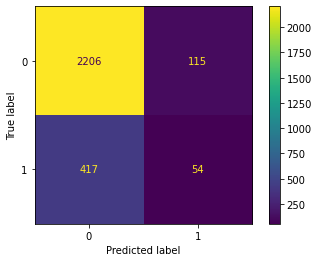

In [45]:
get_confusion_matrix(y_test, y_pred, log_clf.classes_)

In [46]:
target_names = ['Predicted would not leave', 'Predicted would leave']
get_classification_report(y_test, y_pred, target_names)

                           precision    recall  f1-score   support

Predicted would not leave       0.84      0.95      0.89      2321
    Predicted would leave       0.32      0.11      0.17       471

                 accuracy                           0.81      2792
                macro avg       0.58      0.53      0.53      2792
             weighted avg       0.75      0.81      0.77      2792



#### SVC

In [47]:
svc = get_model('SVC')

In [48]:
%%time
svc.fit(X_train, y_train)

/home/tushar/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/tushar/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/tushar/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/tushar/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetri

CPU times: user 1min 59s, sys: 321 ms, total: 2min
Wall time: 2min


GridSearchCV(cv=4, estimator=SVC(random_state=0),
             param_grid={'C': [1, 0.1, 0.01], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf']},
             refit='roc_auc',
             scoring={'f1', 'recall', 'roc_auc', 'accuracy', 'precision'})

In [49]:
svc.best_params_

{'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}

In [50]:
svc.best_score_

0.9576975865116548

In [51]:
svc_cv_results = make_results('SVC cv', svc, 'auc')
print(svc_cv_results)

    model  precision    recall        F1  accuracy       auc
0  SVC cv   0.777424  0.866061  0.819324  0.935643  0.957698


In [52]:
svc_test_scores = get_scores('SVC test', svc, X_test, y_test)
svc_test_scores

,model,precision,recall,f1,accuracy,AUC
0,SVC test,0.803468,0.88535,0.842424,0.944126,0.920702


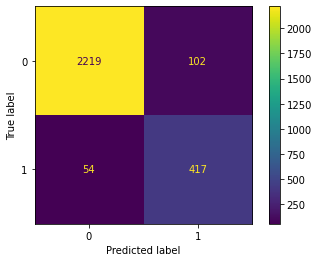

In [54]:
preds = svc.best_estimator_.predict(X_test)

get_confusion_matrix(y_test, preds, svc.classes_)

#### KNN

In [55]:
knn = get_model('KNN')

In [56]:
%%time
knn.fit(X_train, y_train)

CPU times: user 40.8 s, sys: 533 ms, total: 41.3 s
Wall time: 23.8 s


GridSearchCV(cv=4, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree'],
                         'n_neighbors': [5, 10, 20],
                         'weights': ['uniform', 'distance']},
             refit='roc_auc',
             scoring={'f1', 'recall', 'roc_auc', 'accuracy', 'precision'})

In [57]:
knn.best_params_

{'algorithm': 'auto', 'n_neighbors': 20, 'weights': 'uniform'}

In [58]:
knn.best_score_

0.9560094496920108

In [59]:
knn_cv_results = make_results('KNN cv', knn, 'auc')
print(knn_cv_results)

    model  precision   recall        F1  accuracy       auc
0  KNN cv   0.787728  0.87669  0.829443  0.939225  0.956009


In [60]:
knn_test_scores = get_scores('KNN test', knn, X_test, y_test)
knn_test_scores

,model,precision,recall,f1,accuracy,AUC
0,KNN test,0.795019,0.881104,0.835851,0.941619,0.917502


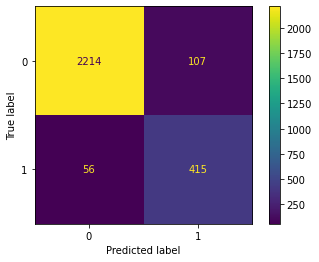

In [61]:
preds = knn.best_estimator_.predict(X_test)

get_confusion_matrix(y_test, preds, knn.classes_)

#### Naive Bayes

In [62]:
naive_bayes = get_model('NB').fit(X_train, y_train)

In [63]:
y_pred = naive_bayes.predict(X_test)

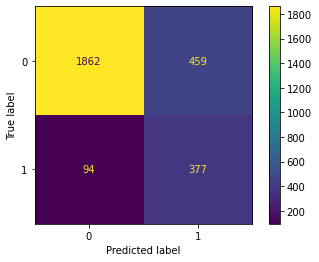

In [64]:
# Plot confusion matrix
get_confusion_matrix(y_test, y_pred, naive_bayes.classes_)

In [66]:
# Create classification report for naive bayes model
target_names = ['Predicted would not leave', 'Predicted would leave']
get_classification_report(y_test, y_pred, target_names)

                           precision    recall  f1-score   support

Predicted would not leave       0.95      0.80      0.87      2321
    Predicted would leave       0.45      0.80      0.58       471

                 accuracy                           0.80      2792
                macro avg       0.70      0.80      0.72      2792
             weighted avg       0.87      0.80      0.82      2792



#### Gradient Boosting Classifier

In [67]:
gbc = get_model('GBC')

In [68]:
%%time
gbc.fit(X_train, y_train)

/home/tushar/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/tushar/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/tushar/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/tushar/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetri

CPU times: user 9min 31s, sys: 88.4 ms, total: 9min 31s
Wall time: 9min 32s


GridSearchCV(cv=4, estimator=GradientBoostingClassifier(random_state=0),
             param_grid={'learning_rate': [0.1, 0.01],
                         'loss': ['log_loss', 'exponential'],
                         'max_depth': [3, 5, 7],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [100, 300]},
             refit='roc_auc',
             scoring={'f1', 'recall', 'roc_auc', 'accuracy', 'precision'})

In [69]:
gbc.best_params_

{'learning_rate': 0.01,
 'loss': 'exponential',
 'max_depth': 5,
 'max_features': 'sqrt',
 'min_samples_split': 4,
 'n_estimators': 300}

In [70]:
gbc.best_score_

0.973244722143926

In [71]:
gbc_cv_results = make_results('Gradient Boosting Classifier cv', gbc, 'auc')
print(gbc_cv_results)

                             model  precision    recall        F1  accuracy  \
0  Gradient Boosting Classifier cv   0.924366  0.880953  0.902026  0.967762   

        auc  
0  0.973245  


In [72]:
gbc_test_scores = get_scores('Gradient Boosting Classifier test', gbc, X_test, y_test)
gbc_test_scores

,model,precision,recall,f1,accuracy,AUC
0,Gradient Boosting Classifier test,0.921875,0.876858,0.898803,0.966691,0.930889


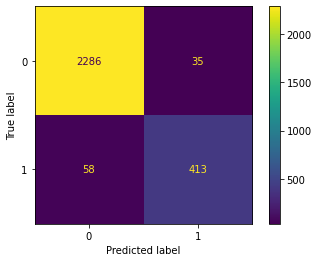

In [73]:
preds = gbc.best_estimator_.predict(X_test)

get_confusion_matrix(y_test, preds, gbc.classes_)

#### Quadratic Discriminant Analysis

In [74]:
qda = get_model('QDA').fit(X_train, y_train)

/home/tushar/.local/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [75]:
# Use the QDA to get predictions on the test set
y_pred = qda.predict(X_test)

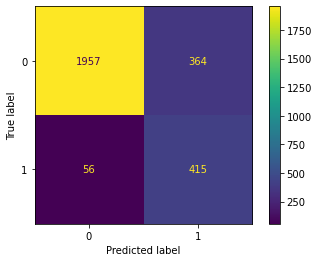

In [76]:
get_confusion_matrix(y_test, y_pred, qda.classes_)

In [77]:
# Create classification report for QDA
target_names = ['Predicted would not leave', 'Predicted would leave']
get_classification_report(y_test, y_pred, target_names)

                           precision    recall  f1-score   support

Predicted would not leave       0.97      0.84      0.90      2321
    Predicted would leave       0.53      0.88      0.66       471

                 accuracy                           0.85      2792
                macro avg       0.75      0.86      0.78      2792
             weighted avg       0.90      0.85      0.86      2792



#### XGBoost Classifier

In [78]:
xgb = get_model('XGB')

In [79]:
%%time
xgb.fit(X_train, y_train)

CPU times: user 1h 47min 59s, sys: 1min 3s, total: 1h 49min 3s
Wall time: 14min 38s


GridSearchCV(cv=4,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=0, ...),
             param_grid={'colsample_bytree': [0.6, 0.8, 1],
                         'gamma': [0.1, 0.3, 0.5],
                         'learning_rate': [1, 0.1, 0.01], 'max_depth': [5, 7],
                         'min_child_weight': [3, 5, 7],
                         'n_estimators': [100, 300],
                         'objective': ['binary:logistic']},
             refit='roc_auc',
             scoring={'f1', 'recall', 'roc_auc', 'accuracy', 'precision'})

In [80]:
xgb.best_params_

{'colsample_bytree': 1,
 'gamma': 0.1,
 'learning_rate': 0.1,
 'max_depth': 5,
 'min_child_weight': 3,
 'n_estimators': 100,
 'objective': 'binary:logistic'}

In [81]:
xgb.best_score_

0.9742078486996071

In [82]:
xgb_cv_results = make_results('XGBBoost Classifier cv', xgb, 'auc')
print(xgb_cv_results)

                    model  precision    recall        F1  accuracy       auc
0  XGBBoost Classifier cv   0.910695  0.895834  0.903136  0.967642  0.974208


In [83]:
xgb_test_scores = get_scores('XGBBoost Classifier test', xgb, X_test, y_test)
xgb_test_scores

,model,precision,recall,f1,accuracy,AUC
0,XGBBoost Classifier test,0.913043,0.89172,0.902256,0.967407,0.937243


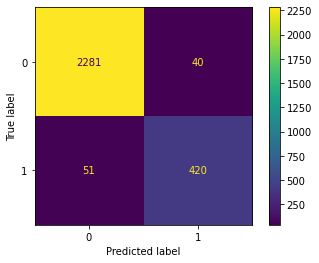

In [85]:
preds = xgb.best_estimator_.predict(X_test)

get_confusion_matrix(y_test, preds, xgb.classes_)

#### Data Preparation

In [86]:
y = df2['left']

X = df2.drop('left', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=0)

#### Decision tree

In [87]:
# Instantiate model
tree = get_model('DT')

In [88]:
%%time
tree.fit(X_train, y_train)

CPU times: user 3.76 s, sys: 4.12 ms, total: 3.76 s
Wall time: 3.79 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                         'min_samples_split': [2, 4, 6]},
             refit='roc_auc',
             scoring={'f1', 'recall', 'roc_auc', 'accuracy', 'precision'})

In [89]:
tree.best_params_

{'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 6}

In [90]:
tree.best_score_

0.9586752505340426

In [91]:
tree_cv_results = make_results('decision tree cv', tree, 'auc')
print(tree_cv_results)

              model  precision    recall        F1  accuracy       auc
0  decision tree cv   0.856693  0.903553  0.878882  0.958523  0.958675


In [92]:
tree_test_scores = get_scores('decision tree test', tree, X_test, y_test)
tree_test_scores

,model,precision,recall,f1,accuracy,AUC
0,decision tree test,0.783877,0.917671,0.845513,0.944296,0.933635


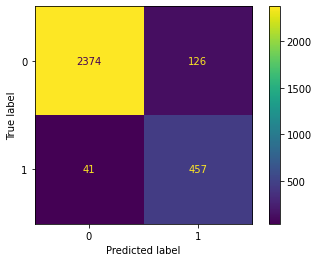

In [94]:
preds = tree.best_estimator_.predict(X_test)

get_confusion_matrix(y_test, preds, tree.classes_)

#### Decision tree splits

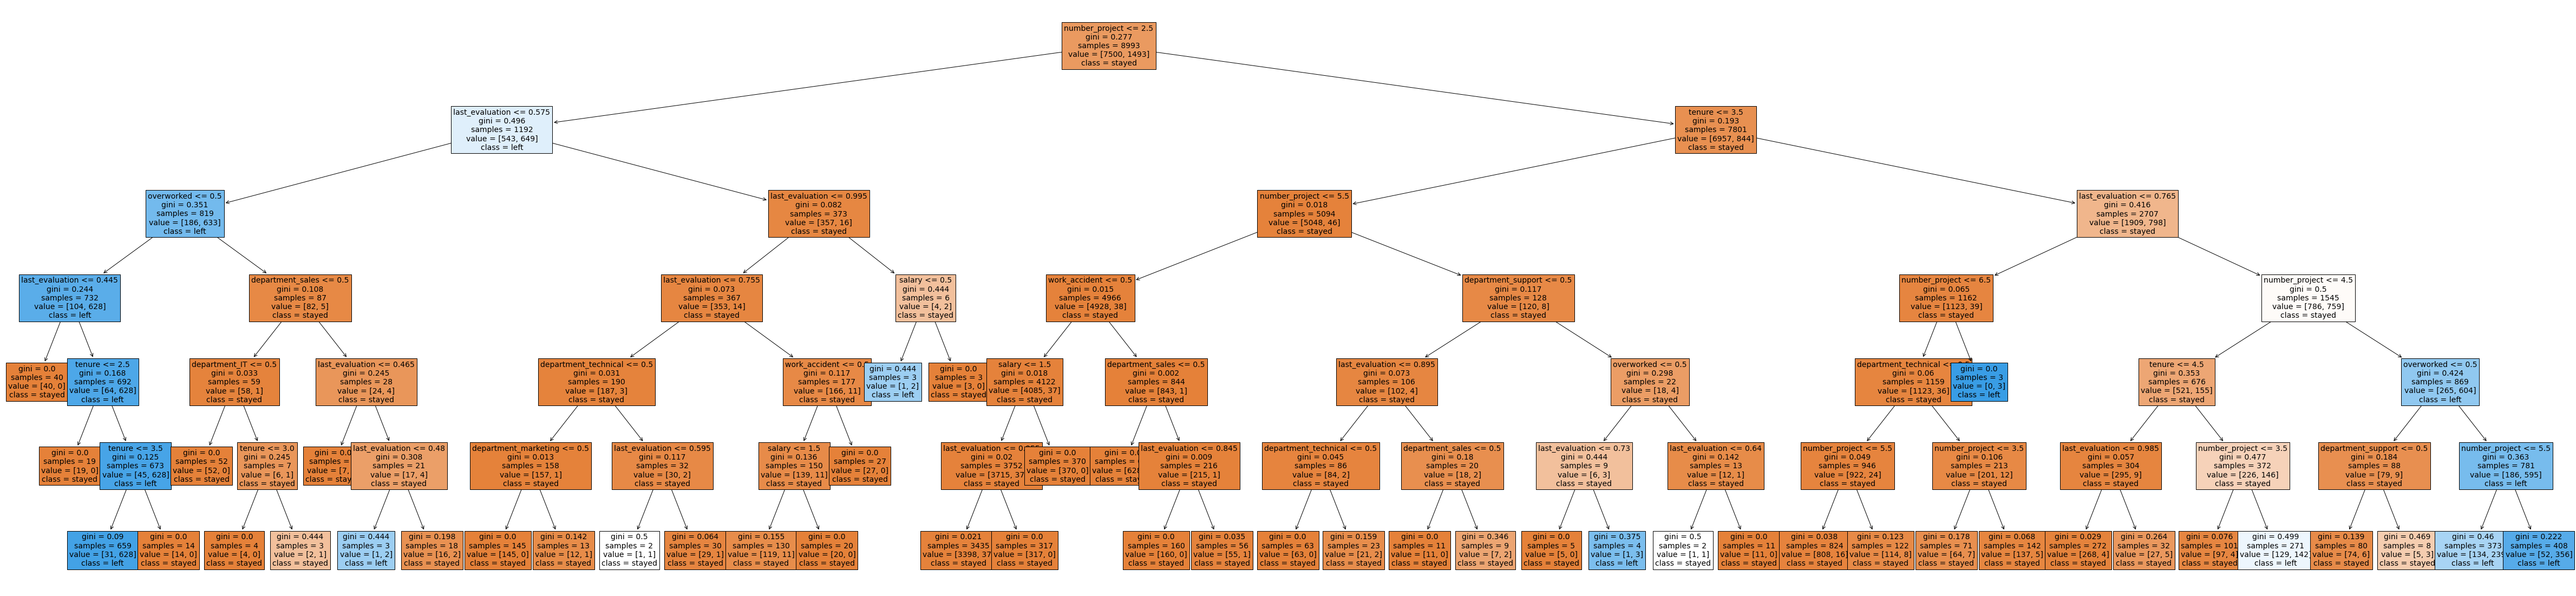

In [95]:
# Plot the tree
plt.figure(figsize=(85,20))
plot_tree(tree.best_estimator_, max_depth=6, fontsize=14, feature_names=X.columns, 
          class_names={0:'stayed', 1:'left'}, filled=True);
plt.show()

#### Decision tree feature importance

In [96]:
tree_importances = pd.DataFrame(tree.best_estimator_.feature_importances_, 
                                 columns=['gini_importance'], 
                                 index=X.columns
                                )
tree_importances = tree_importances.sort_values(by='gini_importance', ascending=False)

# Only extract the features with importances > 0
tree_importances = tree_importances[tree_importances['gini_importance'] != 0]
tree_importances

,gini_importance
last_evaluation,0.343958
number_project,0.343385
tenure,0.215681
overworked,0.093498
department_support,0.001142
salary,0.000910
department_sales,0.000607
department_technical,0.000418
work_accident,0.000183
department_IT,0.000139


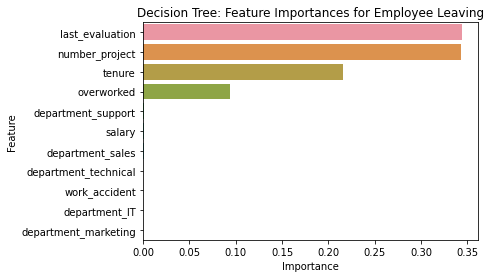

In [97]:
sns.barplot(data=tree_importances, x="gini_importance", y=tree_importances.index, orient='h')
plt.title("Decision Tree: Feature Importances for Employee Leaving", fontsize=12)
plt.ylabel("Feature")
plt.xlabel("Importance")
plt.show()

#### Random forest

In [98]:
rf = get_model('RF')

In [99]:
%%time
rf.fit(X_train, y_train)

CPU times: user 19min 29s, sys: 784 ms, total: 19min 30s
Wall time: 19min 30s


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [3, 5, None], 'max_features': [1.0],
                         'max_samples': [0.7, 1.0],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [300, 500]},
             refit='roc_auc',
             scoring={'f1', 'recall', 'roc_auc', 'accuracy', 'precision'})

In [100]:
# Write pickle
write_pickle(rf, 'hr_rf')

In [102]:
# Read in pickle
rf = read_pickle('hr_rf')

In [103]:
# Check best params
rf.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 300}

In [104]:
rf.best_score_

0.9648100662833985

In [105]:
rf_cv_results = make_results('random forest2 cv', rf, 'auc')
print(rf_cv_results)

               model  precision    recall        F1  accuracy      auc
0  random forest2 cv   0.866758  0.878754  0.872407  0.957411  0.96481


In [106]:
rf_test_scores = get_scores('random forest2 test', rf, X_test, y_test)
rf_test_scores

,model,precision,recall,f1,accuracy,AUC
0,random forest2 test,0.870406,0.903614,0.8867,0.961641,0.938407


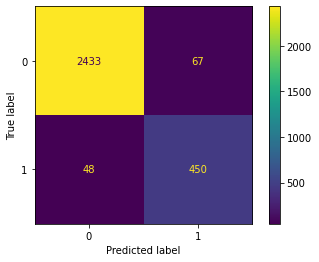

In [108]:
preds = rf.best_estimator_.predict(X_test)

get_confusion_matrix(y_test, preds, rf.classes_)

#### Random forest feature importance

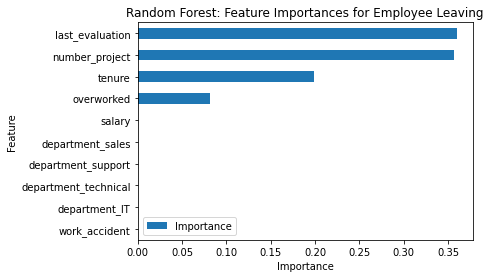

In [109]:
feat_impt = rf.best_estimator_.feature_importances_

ind = np.argpartition(rf.best_estimator_.feature_importances_, -10)[-10:]

feat = X.columns[ind]

feat_impt = feat_impt[ind]

y_df = pd.DataFrame({"Feature":feat,"Importance":feat_impt})
y_sort_df = y_df.sort_values("Importance")
fig = plt.figure()
ax1 = fig.add_subplot(111)

y_sort_df.plot(kind='barh',ax=ax1,x="Feature",y="Importance")

ax1.set_title("Random Forest: Feature Importances for Employee Leaving", fontsize=12)
ax1.set_ylabel("Feature")
ax1.set_xlabel("Importance")

plt.show()

### **Model Performances**

<center>

| Model | Precision | Recall | F1-Score | Accuracy |
|-------|-----------|--------|----------|----------|
| Logistic Regression | 0.75 | 0.81 | 0.77 | 0.81 |
| Naive Bayes | 0.87 | 0.80 | 0.82 | 0.80 |
| KNN | 0.79 | 0.88 | 0.83 | 0.94 |
| SVC | 0.80 | 0.88 | 0.84 | 0.94 |
| Decision Tree | 0.78 | 0.92 | 0.85 | 0.94 |
| Quadratic Discriminant Analysis | 0.90 | 0.85 | 0.86 | 0.85 |
| Random Forest | 0.87 | 0.90 | 0.88 | 0.96 |
| Gradient Boosting | 0.92 | 0.87 | 0.89 | 0.97 |
| XGBoost | 0.91 | 0.89 | 0.90 | 0.97 |

</center>

### **Actionable Steps**

#### **Policy Review**


- Because there is a step change in the satisfaction level of the employees who left after the service of 4 years.
- Most of the left employees are overworked and not promoted in the last 5 years.

#### **Over-Working**

- Employees involve in multiple project(>3) are overworked and are more likely to left the company

#### **Proper Engagement**

- There is a cluster of left employees who works less than average monthly hours and having low satisfaction level, need more and proper engagement.
- There are mployees who have more working hours than average and good satisfaction level but they left may be because of some better deal else where.

#### **Other Factors**

- Most of the employee leave between 2 to 5 years of service.
- `last_evaluation`, `number_project`, and `average_monthly_hours` has good correlation with each other.
- `satisfaction_level` is correlated with `left`, `tenure` and `number_project`.

## **Conclusion**

The best `F1-Score` and `Accuracy` is achieved with XGBoost model and `last_evaluation`, `number_project`, `tenure`, and `overworked` are the most important features in deciding of churn employee.
* Employee invovle in more than 3 projects have high chance of leaving the company.
* Most of the employee leave between the year 2 to 5.
* Large proportions of emplyee leaving comes from those who are the most overworked and good evaluation score or those who worked less than average and low evaluation score.